In [102]:
# ========== 1. IMPORTA√á√ïES ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


Primeiras 5 linhas do conjunto de dados:
  Crop_Type  Temperature  Humidity  Soil_pH  Crop_Yield
0     Wheat        9.441    80.000      5.5       0.000
1      Corn       20.053    79.947      6.5     104.871
2      Rice       12.143    80.000      5.5       0.000
3    Potato       18.896    80.000      5.5      54.260
4     Wheat       16.044    80.000      5.5      28.724


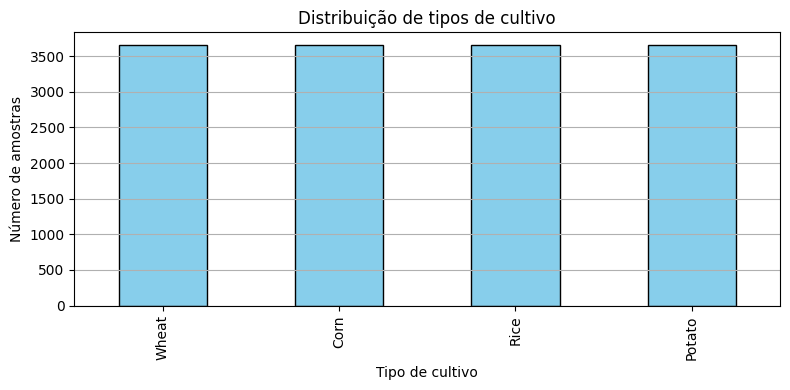

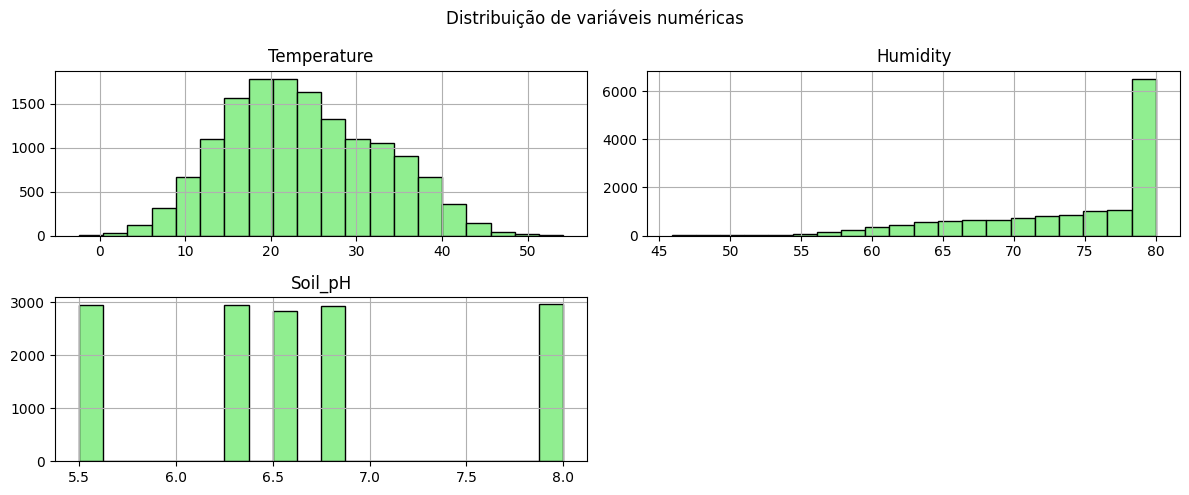

In [103]:
# ========== 2. CARREGUE E EXPLORE DADOS ==========

# Carregar dataset
df = pd.read_csv('crop_yield_dataset2.csv')

# Mostrar as primeiras linhas
print("Primeiras 5 linhas do conjunto de dados:")
print(df.head())

# Gr√°fico de barras de tipos de cultivo

plt.figure(figsize=(8, 4))
df['Crop_Type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribui√ß√£o de tipos de cultivo")
plt.xlabel("Tipo de cultivo")
plt.ylabel("N√∫mero de amostras")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Histograma de vari√°veis ‚Äã‚Äãnum√©ricas
df[['Temperature', 'Humidity', 'Soil_pH']].hist(bins=20, figsize=(12, 5), color='lightgreen', edgecolor='black')
plt.suptitle("Distribui√ß√£o de vari√°veis ‚Äã‚Äãnum√©ricas")
plt.tight_layout()
plt.show()

In [104]:
# ========== 3. PR√â-PROCESSAMENTO ==========

# Codifica√ß√£o do tipo de cultivo (de texto a n√∫mero)
label_encoder = LabelEncoder()
df['Crop_Type_Encoded'] = label_encoder.fit_transform(df['Crop_Type'])

#Mostrar mapeamento de r√≥tulos
print("\nMapeando r√≥tulos para Crop_Type:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{i} -> {class_name}")

# Defini√ß√£o de vari√°veis ‚Äã‚Äãindependentes (X) e vari√°vel dependente (y)
X = df[['Crop_Type_Encoded', 'Temperature', 'Humidity', 'Soil_pH']]
y = df['Crop_Yield']


Mapeando r√≥tulos para Crop_Type:
0 -> Corn
1 -> Potato
2 -> Rice
3 -> Wheat


In [105]:
# Dimensionamento de recursos para melhor converg√™ncia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Salvar m√©dia e desvio padr√£o
print("\nPar√¢metros de normaliza√ß√£o (m√©dia e desvio padr√£o):")
print("Media:", scaler.mean_)
print("Desvio padr√£o:", scaler.scale_)


Par√¢metros de normaliza√ß√£o (m√©dia e desvio padr√£o):
Media: [ 1.5        23.81041915 74.25899596  6.60175931]
Desvio padr√£o: [1.11803399 8.90597692 6.74026108 0.81956434]


In [106]:
# Divis√£o em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [107]:
# ========== 4. DEFINI√á√ÉO E TREINAMENTO DO MODELO ==========
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation= 'relu')  # Sa√≠da cont√≠nua para regress√£o
])

In [108]:
# Compila√ß√£o
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [109]:
# === RESUMO DA ARQUITETURA DO MODELO ===
print("Resumo da arquitetura do modelo:")
model.summary()

Resumo da arquitetura do modelo:


Model: "sequential_4"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_12 (Dense)                ‚îÇ (None, 128)            ‚îÇ           640 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_13 (Dense)                ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_14 (Dense)                ‚îÇ (None, 1)              ‚îÇ            65 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 8,961 (35.00 KB)

 Trainable params: 8,961 (35.00 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
print(X_train.shape)


(11686, 4)


In [111]:
callbacks1 = [
    EarlyStopping(
        monitor='val_mse',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_mse',
        factor=0.5,
        patience=8,
        min_lr=1e-7,
        verbose=1
    )
]
# Modelo de treinamento

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=callbacks1,
    verbose=1
)

Epoch 1/100
293/293 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 5ms/step - loss: 928.1824 - mae: 22.4093 - mse: 928.1824 - val_loss: 308.5940 - val_mae: 12.7843 - val_mse: 308.5940 - learning_rate: 0.0010
Epoch 2/100
293/293 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step - loss: 244.3568 - mae: 11.0245 - mse: 244.3568 - val_loss: 156.1647 - val_mae: 8.1662 - val_mse: 156.1647 - learning_rate: 0.0010
Epoch 3/100
293/293 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - loss: 143.0225 - mae: 7.9816 - mse: 143.0225 - val_loss: 113.9676 - val_mae: 6.7829 - val_mse: 113.9676 - learning_rate: 0.0010
Epoch 4/100
293/293 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 91.5609 - mae: 6.2575 - mse: 91.5609 - val_loss: 74.5476 - val_mae: 5.5689 - val_mse: 74.5476 - learning_rate: 0.0010
Epoch 5/100
293/293 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 67.2596 

In [78]:
# ========== 5. AVALIA√á√ÉO DO MODELO ==========
loss, mae, mse = model.evaluate(X_test, y_test)
print(f"\nAvalia√ß√£o no conjunto de testes:")
print(f"MAE (Erro absoluto m√©dio): {mae:.2f}")
print(f"MSE (Erro quadr√°tico m√©dio): {mse:.2f}")

92/92 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 14.1669 - mae: 2.2587 - mse: 14.1669

Avalia√ß√£o no conjunto de testes:
MAE (Erro absoluto m√©dio): 2.28
MSE (Erro quadr√°tico m√©dio): 14.77


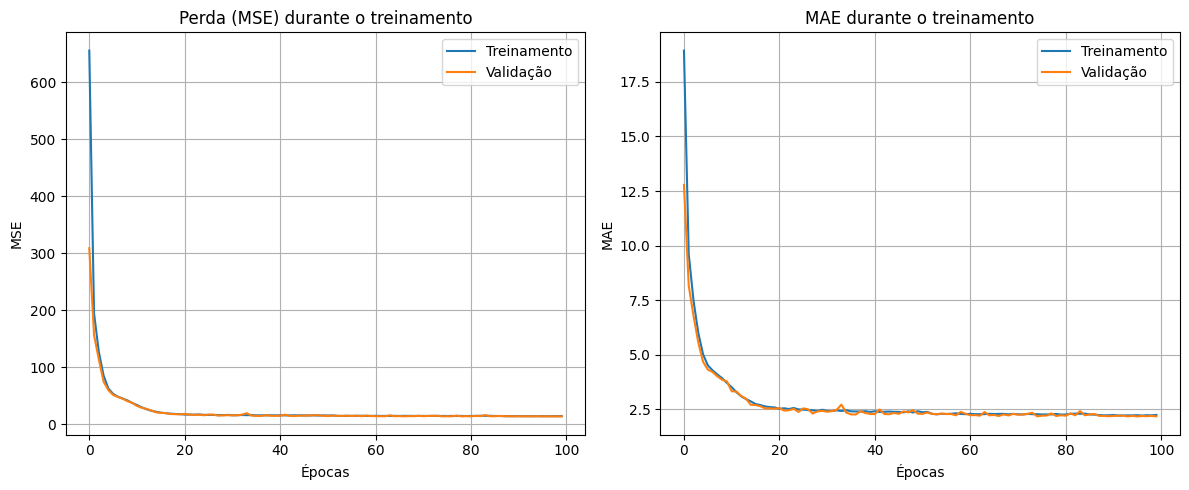

In [117]:
# ========== 6. GR√ÅFICOS ==========

plt.figure(figsize=(12, 5))

# Perda (MSE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Valida√ß√£o')
plt.title("Perda (MSE) durante o treinamento")
plt.xlabel("√âpocas")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)

# MAE (Erro M√©dio Absoluto)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Treinamento')
plt.plot(history.history['val_mae'], label='Valida√ß√£o')
plt.title("MAE durante o treinamento")
plt.xlabel("√âpocas")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

92/92 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step


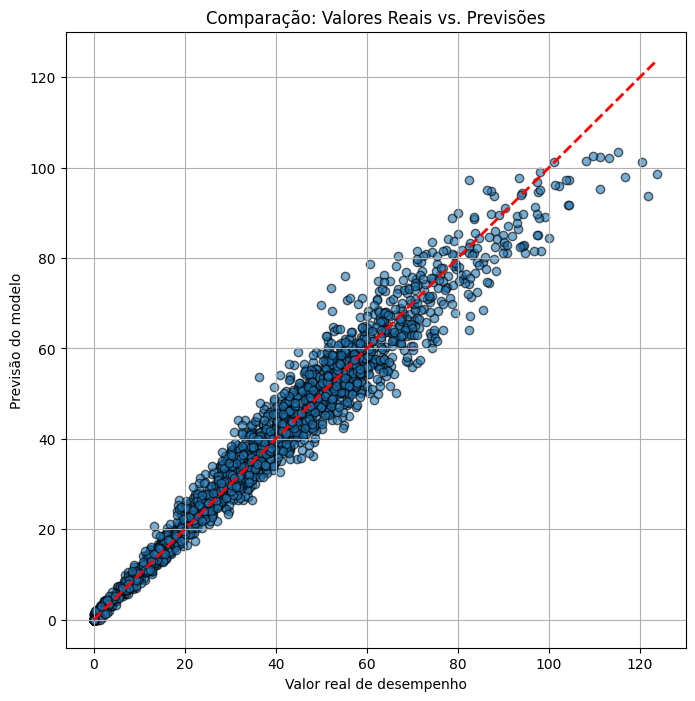


Primeiras 10 previs√µes vs valores reais:
Real: 2.33 | Previs√£o: 4.08
Real: 13.85 | Previs√£o: 12.03
Real: 70.71 | Previs√£o: 75.33
Real: 4.13 | Previs√£o: 3.84
Real: 38.46 | Previs√£o: 41.06
Real: 116.77 | Previs√£o: 98.01
Real: 43.64 | Previs√£o: 48.02
Real: 48.38 | Previs√£o: 46.00
Real: 24.09 | Previs√£o: 23.86
Real: 42.59 | Previs√£o: 46.59


In [113]:
# ========== 7. COMPARA√á√ÉO REAL VS PREVIS√ÉO ==========

# Previs√µes no conjunto de teste
y_pred = model.predict(X_test).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor real de desempenho')
plt.ylabel('Previs√£o do modelo')
plt.title('Compara√ß√£o: Valores Reais vs. Previs√µes')
plt.grid(True)
plt.show()

# Mostrar algumas previs√µes individuais
print("\nPrimeiras 10 previs√µes vs valores reais:")
for i in range(10):
    print(f"Real: {y_test.iloc[i]:.2f} | Previs√£o: {y_pred[i]:.2f}")


In [114]:
# ========== 8. CONVERS√ÉO PARA TFLITE (Modelo N√£o Quantizado) ==========
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Salva o modelo convertido
with open("crop_yield_model.tflite", "wb") as f:
    f.write(tflite_model)

print("\n Modelo TFLite exportado")

# Mostrar c√≥digo C para incluir modelo no microcontrolador (ESP32)
!xxd -i crop_yield_model.tflite > crop_yield_model.h

Saved artifact at '/tmp/tmp_cp3ttsd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor_16')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132821191467920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132821191468496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132821191469072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132821191469648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132821191468880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132821191470416: TensorSpec(shape=(), dtype=tf.resource, name=None)

 Modelo TFLite exportado


In [115]:
# ========== 9. FUN√á√ÉO PARA PREVIS√ÉO COM DADOS MANUAIS ==========
def predecir_rendimiento(Crop_Type, Temperature, Humidity, Soil_pH):

    crop_encoded = label_encoder.transform([Crop_Type])[0]
    input_array = np.array([[crop_encoded, Temperature, Humidity, Soil_pH]])
    input_scaled = scaler.transform(input_array)
    # Prever com o modelo Keras
    pred = model.predict(input_scaled)[0][0]
    return pred

input_data = {
    'Crop_Type': 'Wheat',
    'Temperature':14.0,
    'Humidity': 77.0,
    'Soil_pH': 5.5
}
prediccion = predecir_rendimiento(**input_data)
print(f"\n Previs√£o manual para {input_data['Crop_Type']}: {prediccion:.2f}")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 125ms/step

 Previs√£o manual para Wheat: 11.23


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [116]:
# ========== 10. EXEMPLO DE PREVIS√ÉO COM MODELO TFLITE ==========

# Dados de entrada manual (o mesmo que ESP32)
raw_input = np.array([3, 15.0, 80.0, 5.5], dtype=np.float32)  # Crop_Type_Encoded, Temp, Humidity, pH

# Normaliza√ß√£o usando m√©dia calculada e desvio padr√£o
mean = scaler.mean_
scale = scaler.scale_
input_scaled = (raw_input - mean) / scale

# Carregar modelo TFLite
interpreter = tf.lite.Interpreter(model_path="crop_yield_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Preparar tensor e prever
interpreter.set_tensor(input_details[0]['index'], input_scaled.reshape(1, -1).astype(np.float32))
interpreter.invoke()
prediction_tflite = interpreter.get_tensor(output_details[0]['index'])

print(f"üìà Predicci√≥n TFLite: {prediction_tflite[0][0]:.2f}")

üìà Predicci√≥n TFLite: 26.96
